# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1. Import the necessary libraries

In [82]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline
import scipy.stats as stats 
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2. Read the data as a data frame

In [83]:
#reading the insurance data
df_insurance = pd.read_csv('D:\SAI\MECH\Great Learning\Study\STATISTICS\project\insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3. Perform basic EDA which should include the following and print out your insights at every step

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">(a) Shape of the data

In [84]:
#Understanding shape of data
df_insurance.shape

(1338, 7)

The dataset has 1338 rows and 7 columns

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3(b) Data type of each attribute

In [85]:
#get datatype of attribute
df_insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The attribute 'sex','smoker' and 'region' is of type object & rest all of int,float type

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3(c) Checking the presence of missing values

In [87]:
#get more information about data
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
#Get the number of missing values in each column
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

from above no missing value & no null value found in data

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3(d) 5 point summary of numerical attributes

In [88]:
#get the summary of data
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


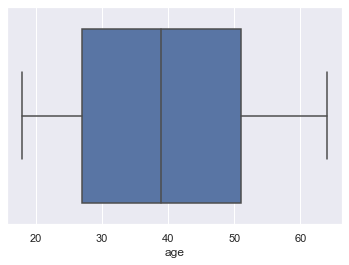

In [89]:
#graphical 5 point summary of age
sns.boxplot(df_insurance['age']);

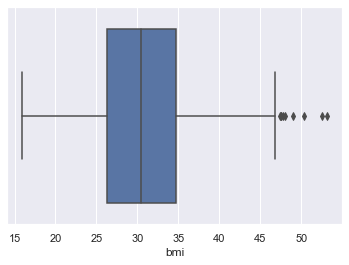

In [90]:
#graphical 5 point summary of bmi
sns.boxplot(df_insurance['bmi']);

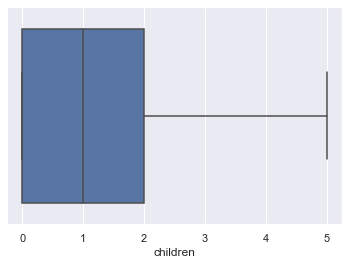

In [91]:
#graphical 5 point summary of children
sns.boxplot(df_insurance['children']);

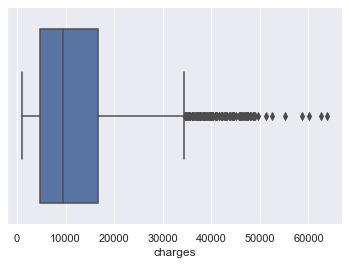

In [92]:
#graphical 5 point summary of charges
sns.boxplot(df_insurance['charges']);

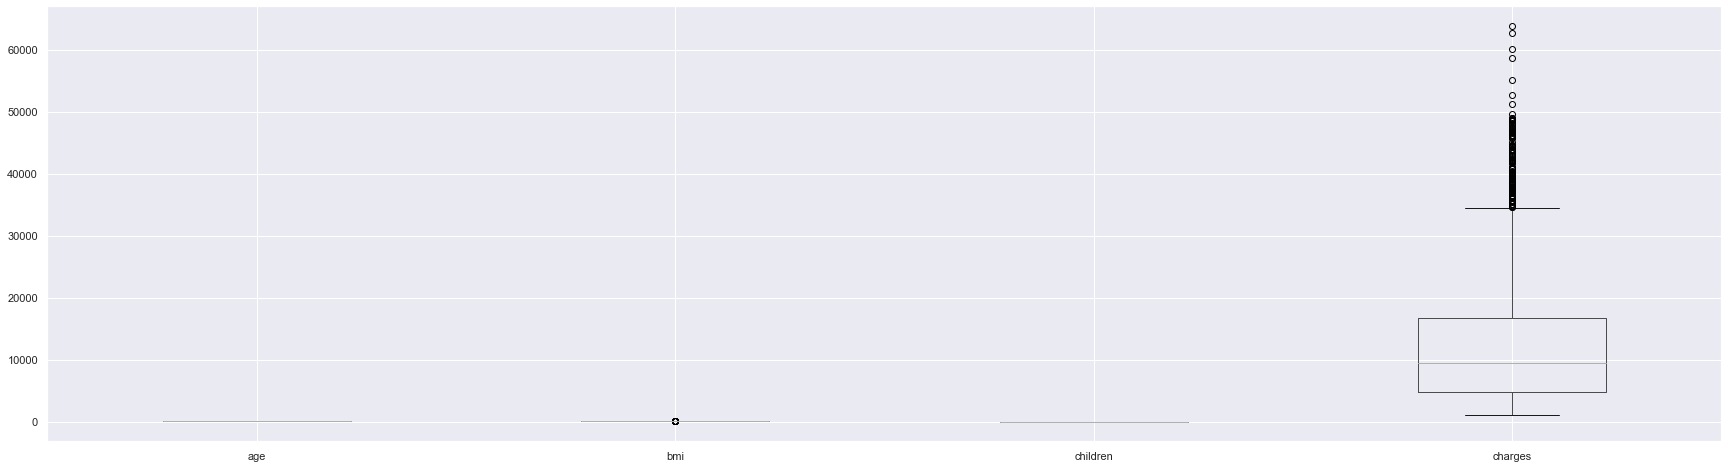

In [93]:
#graphical representation of numerical variables in one view
df_insurance.boxplot(figsize=(30,8));

charges have much more outliers compared to other attributes 

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3(e)   Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

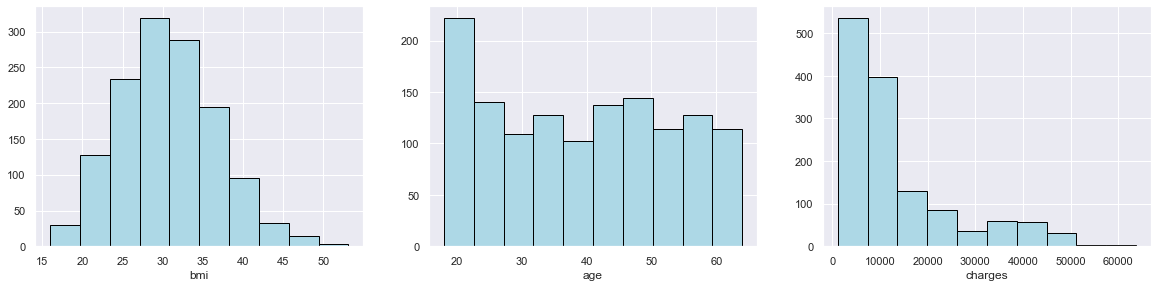

In [30]:
plt.figure(figsize=(20,15)) # set the figure size
plt.subplot(3,3,1)
plt.hist(df_insurance.bmi,color='lightblue',edgecolor='black') #Plot the histogram
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df_insurance.age,color='lightblue',edgecolor='black') #Plot the histogram
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df_insurance.charges,color='lightblue',edgecolor='black') #Plot the histogram
plt.xlabel('charges')

plt.show()

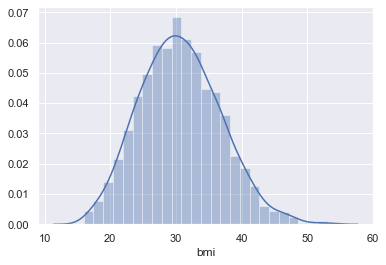

In [32]:
#display graphically the distribution of bmi column
sns.distplot(df_insurance['bmi']);

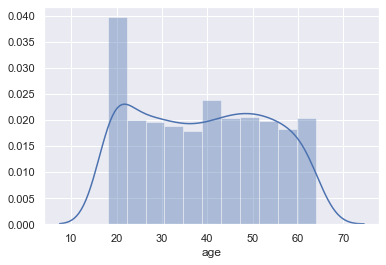

In [33]:
#display graphically the distribution of age column
sns.distplot(df_insurance['age']);

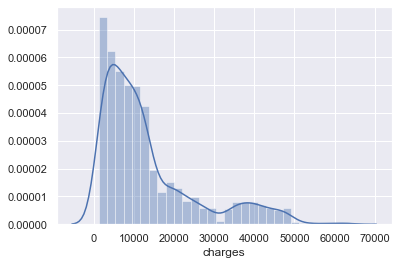

In [34]:
#display graphically the distribution of charges column
sns.distplot(df_insurance['charges']);

bmi has been normaly distrubuted,Very less people with lower bmi exists.

age has been normaly disutrubed,tells highest participation are of 20 age although more higher age people are present.

charges are right skewed in the dataset tells mostly less individual medical costs is billed by health insurance.


# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3(f) Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [94]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df_insurance.bmi),
                                       stats.skew(df_insurance.age),stats.skew(df_insurance.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


Charges are highly skewed compare to other variables bmi & age

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3(g) Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

In [36]:
#presence of outliners for bmi
q1,q3 = df_insurance['bmi'].quantile(0.25),df_insurance['bmi'].quantile(0.75)#q1,q3 of bmi
iqr = q3 - q1 #iqr
cutoff = iqr * 1.5
lower_bound, upper_bound = q1 - cutoff, q3 + cutoff

outliers = [x for x in df_insurance['bmi'] if x < lower_bound or x > upper_bound]
print('Identified outliers for bmi out of 1338 records: %d' % len(outliers))



Identified outliers for bmi out of 1338 records: 9


In [95]:
#presence of outliners for age
q1,q3 = df_insurance['age'].quantile(0.25),df_insurance['age'].quantile(0.75)#q1,q3 of age
iqr = q3 - q1#iqr
cutoff = iqr * 1.5
lower_bound, upper_bound = q1 - cutoff, q3 + cutoff

outliers = [x for x in df_insurance['age'] if x < lower_bound or x > upper_bound]
print('Identified outliers for age out of 1338 records: %d' % len(outliers))


Identified outliers for age out of 1338 records: 0


In [96]:
#presence of outliners for charges
q1,q3 = df_insurance['charges'].quantile(0.25),df_insurance['charges'].quantile(0.75)#q1,q3 of charges
iqr = q3 - q1#iqr
cutoff = iqr * 1.5
lower_bound, upper_bound = q1 - cutoff, q3 + cutoff

outliers = [x for x in df_insurance['charges'] if x < lower_bound or x > upper_bound]
print('Identified outliers for charges out of 1338 records: %d' % len(outliers))


Identified outliers for charges out of 1338 records: 139



bmi has very less extreme values 

age has zero outliners

charges are highly skewed has more outliners 

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3(h) Distribution of categorical columns (include children)

In [97]:
#display how many males and females are there
df_insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

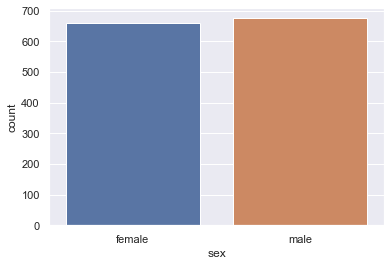

In [98]:
#display graphically count of male and female
sns.countplot(df_insurance['sex'])

In [99]:
#display the count of children
df_insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

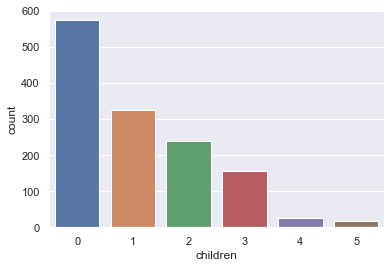

In [100]:
#display grapically the count of children
sns.countplot(df_insurance['children']);

In [101]:
#display the count of region
df_insurance['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

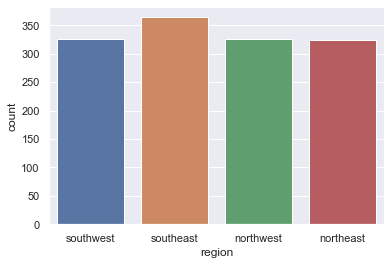

In [102]:
#display graphically the count of region
sns.countplot(df_insurance['region']);

In [103]:
#display the count of people with how many children they are having and they are smoker or not
pd.crosstab(df_insurance['children'],df_insurance['smoker'])

smoker,no,yes
children,,
0,459,115
1,263,61
2,185,55
3,118,39
4,22,3
5,17,1


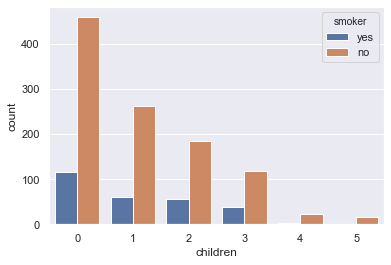

In [45]:
#display graphically the count of people with how many children they are having and they are smoker or not
sns.countplot(df_insurance['children'],hue=df_insurance['smoker']);

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3(i)Pair plot that includes all the columns of the data frame

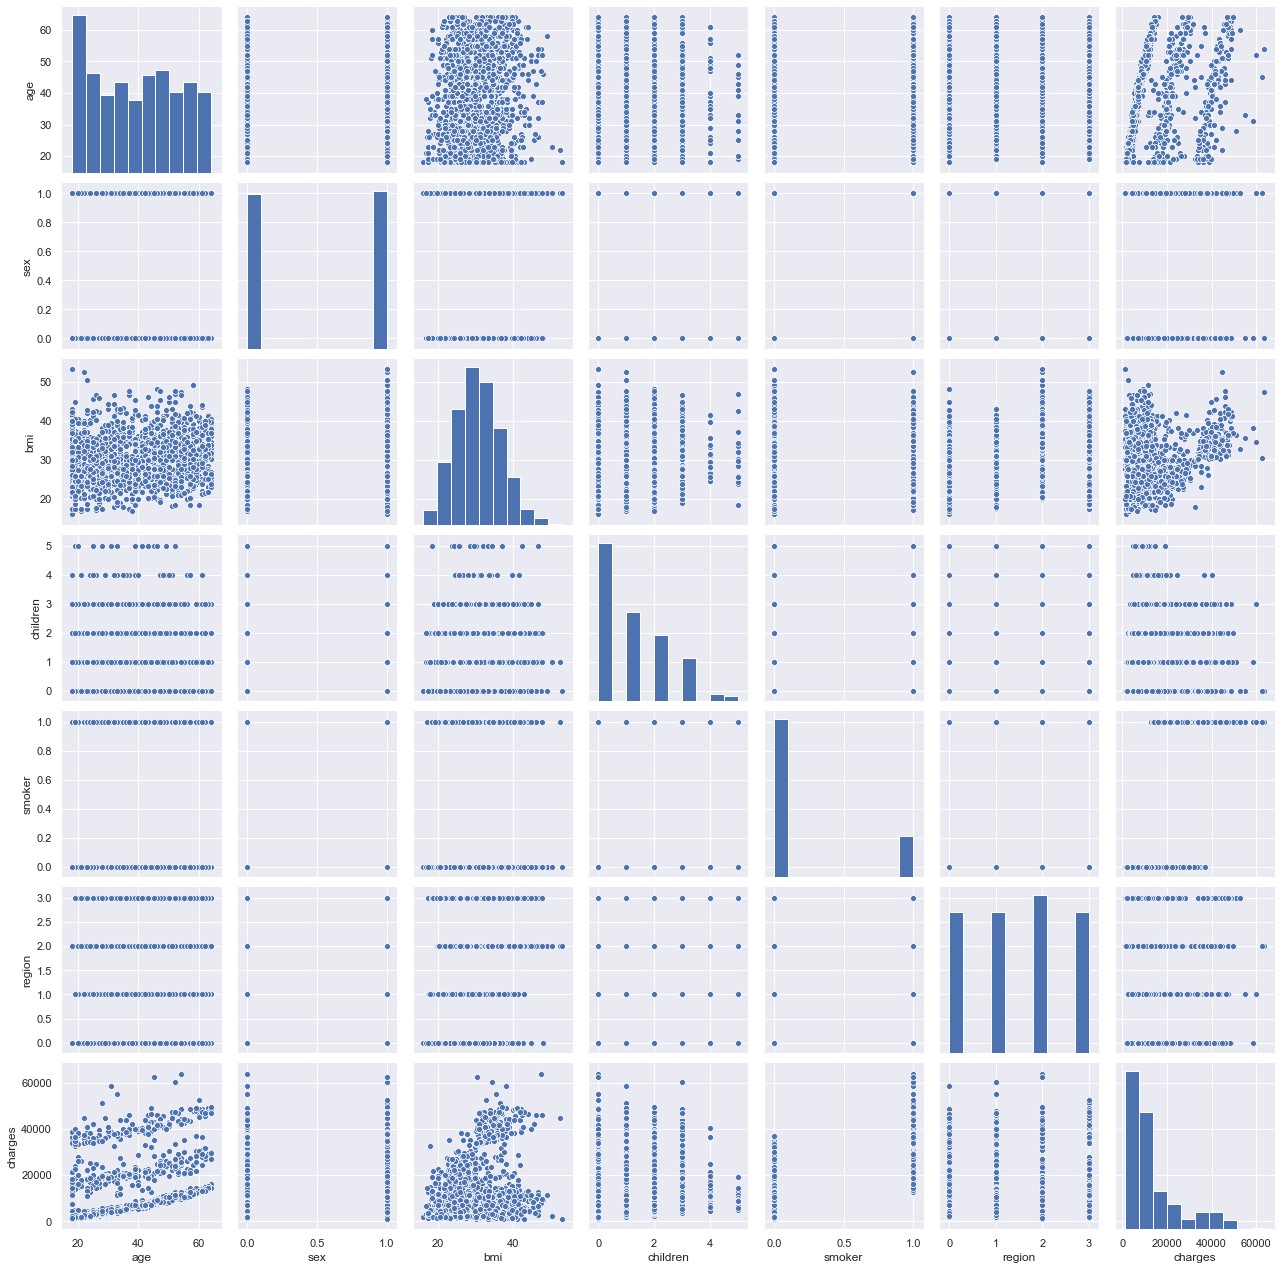

In [104]:
insurance_df_encoded = df_insurance.copy(deep=True)# Copying the dataframe
insurance_df_encoded.loc[:,['sex', 'smoker', 'region']] = df_insurance.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
sns.pairplot(insurance_df_encoded)#pairplot
plt.show()

Graphicall representation of all colums through pairplot

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">4(a). Do charges of people who smoke differ significantly from the people who don't?

In [105]:
#Null Hypothesis--> 
Ho = "Charges of smoker and non-smoker are same"
#Alternate hypothesis--> 
Ha = "Charges of smoker and non-smoker are not the same"

#selecting charges values corresponding to smoker as an array
x = np.array(df_insurance[df_insurance.smoker=='yes'].charges)
#selecting charges values corresponding to not smoker as an array
y= np.array(df_insurance[df_insurance.smoker=='no'].charges)

#performing an independent T-test
t_statistic, p_value = ttest_ind(x, y)

# Checking condition p_value with significance level 5%
if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">4(b).Does bmi of males differ significantly from that of females

In [106]:
#Null Hypothesis--> 
Ho = "Gender has no effect on bmi"
#Alternate hypothesis--> 
Ha = "Gender has an effect on bmi"

#selecting bmi values corresponding to male as an array
x = np.array(df_insurance[df_insurance.sex=='male'].bmi)
#selecting bmi values corresponding to female as an array
y= np.array(df_insurance[df_insurance.sex=='female'].bmi)

#performing an independent T-test
t_statistic, p_value = ttest_ind(x, y)

# Checking condition p_value with significance level 5%
if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Gender has no effect on bmi as the p_value (0.08997637178984932) > 0.05


# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">4(c)Is the proportion of smokers significantly different in different genders

In [107]:
#Null Hypothesis--> 
Ho = "The proportions are equal"
#Alternate hypothesis--> 
Ha = "The two proportions are not equal"

# number of female smokers
female_smokers = df_insurance[df_insurance['sex'] == 'female'].smoker.value_counts()[1]  
# number of male smokers
male_smokers = df_insurance[df_insurance['sex'] == 'male'].smoker.value_counts()[1]
# number of females in the data
n_females = df_insurance.sex.value_counts()[1] 
#number of males in the data
n_males = df_insurance.sex.value_counts()[0] 

print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(female_smokers/n_females,2)}%, {round(male_smokers/n_males,2)}% respectively')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


In [108]:
# importing proportion
from statsmodels.stats.proportion import proportions_ztest

#performing an proportions_ztest
stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

# Checking condition p_value with significance level 5%
if pval < 0.05:
    print(f'{Ha} With a p-value of {round(pval,4)} < 0.05 the difference is significant. aka |We reject the null|')
else:
    print(f'{Ho} With a p-value of {round(pval,4)} > 0.05 the difference is not significant. aka |We fail to reject the null|')

The two proportions are not equal With a p-value of 0.0053 < 0.05 the difference is significant. aka |We reject the null|


# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">4(d)Is the distribution of bmi across women with no children, one child and two children, the same

In [109]:
#Null Hypothesis--> 
Ho = "No. of children has no effect on bmi" 
#Alternate hypothesis--> 
Ha = "No. of children has an effect on bmi"   

#importing copy
import copy
female_df = copy.deepcopy(df_insurance[df_insurance['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']

#Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(zero,one,two)

# Checking condition p_value with significance level 5%
if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
